# RAG Tutorial using langchain

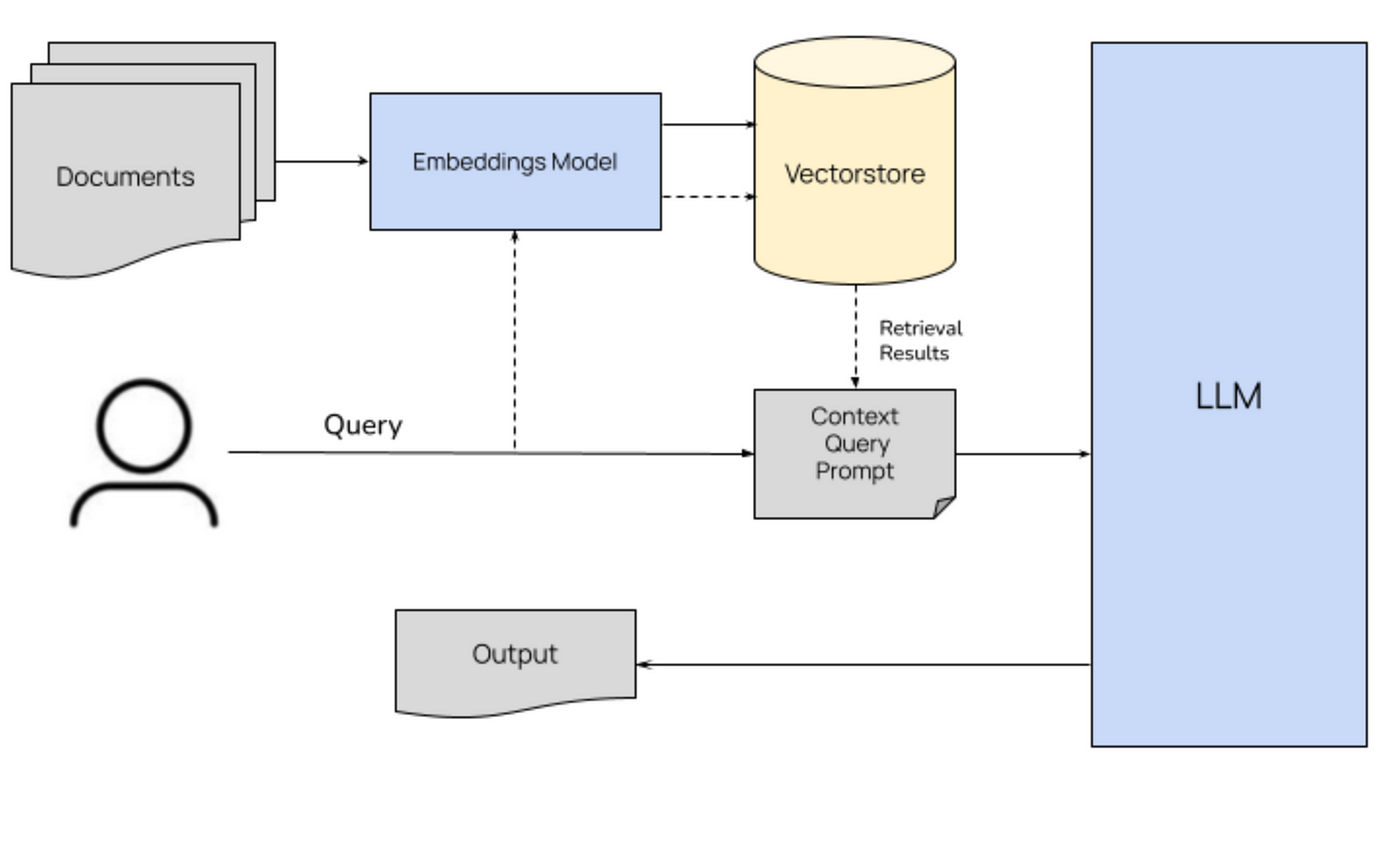

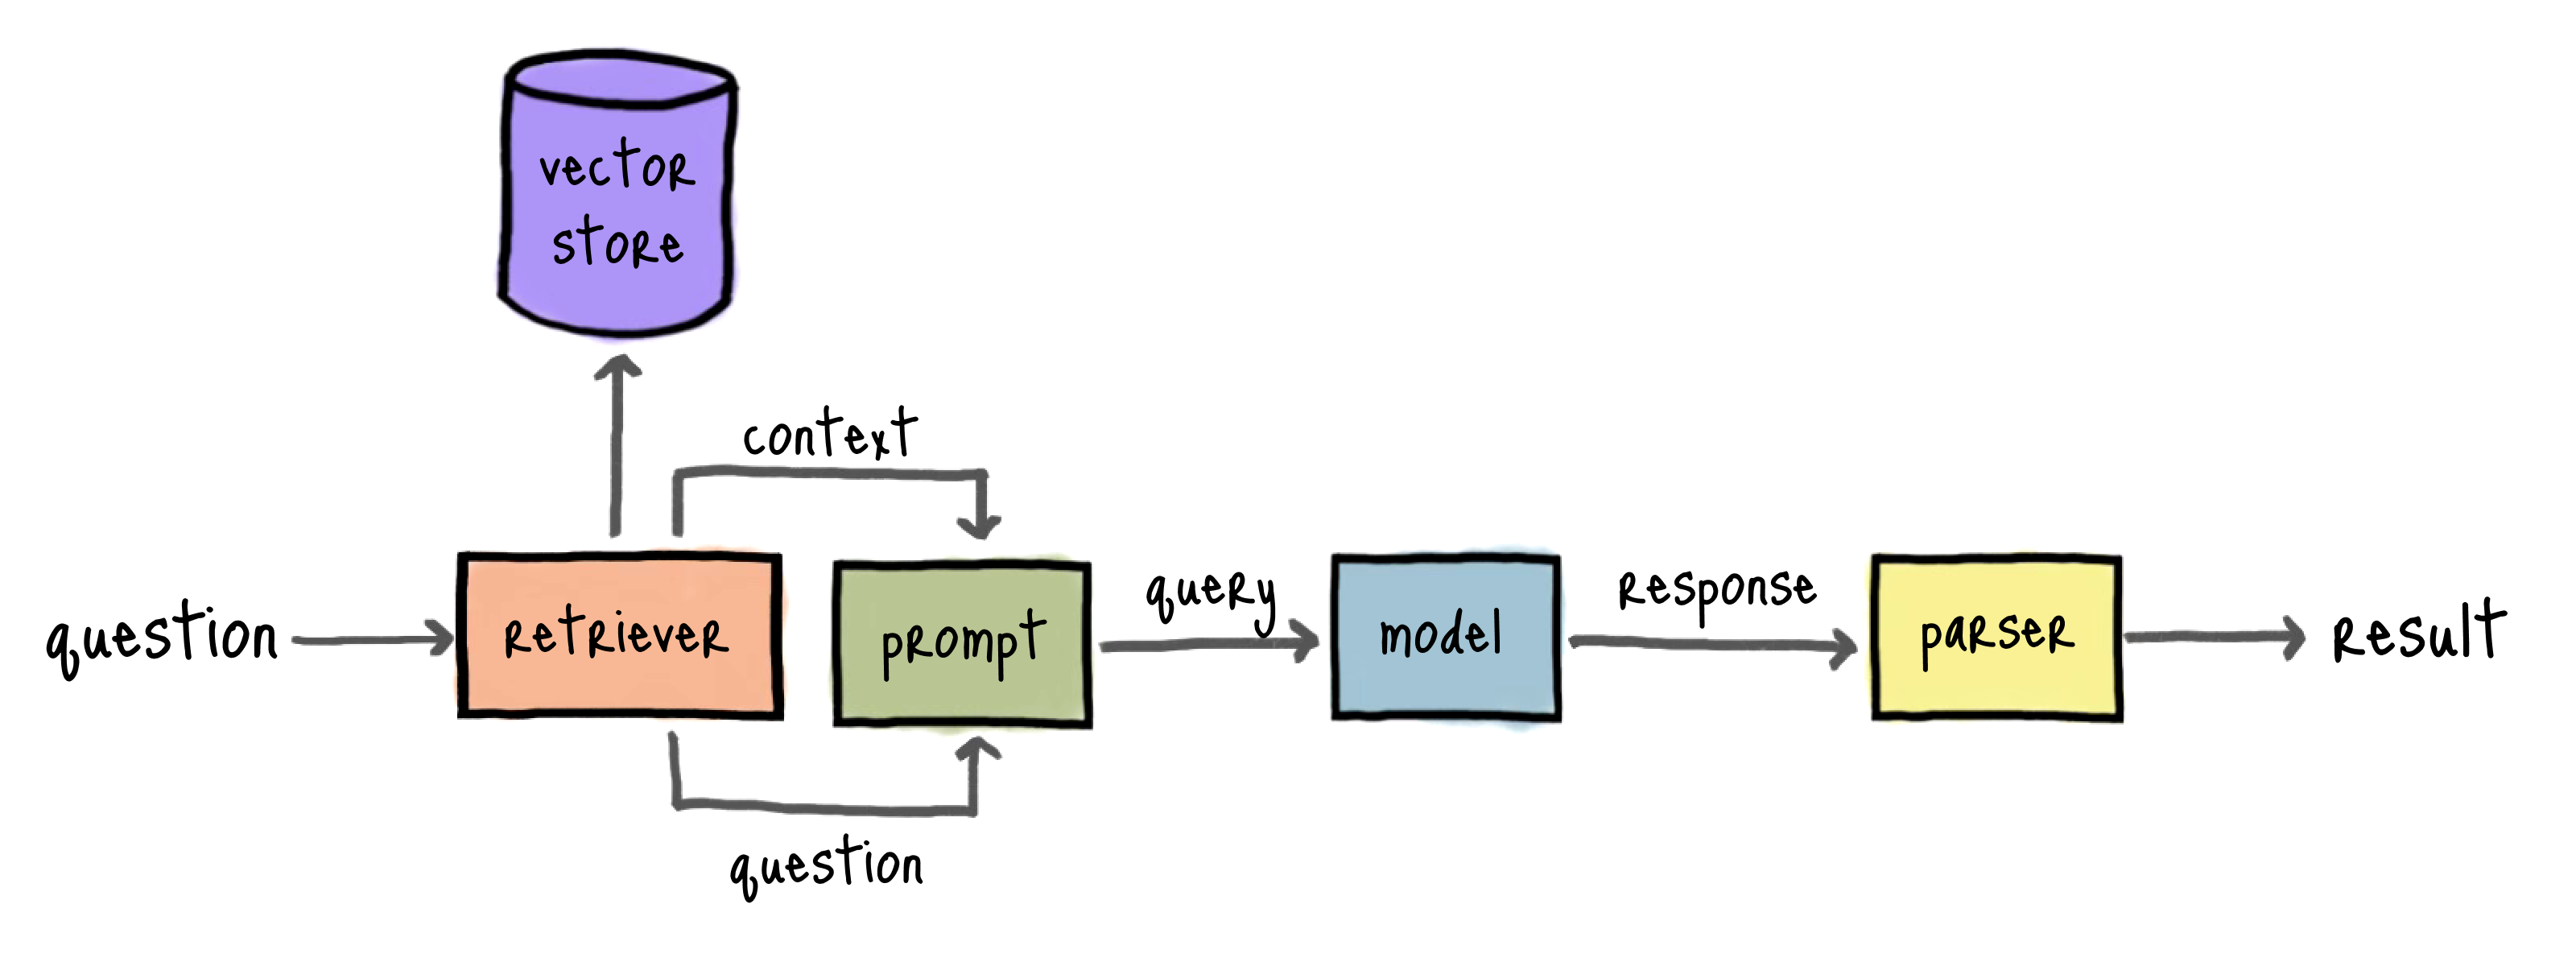

In [1]:
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")
MODEL='gpt-3.5-turbo'   


In [3]:
from langchain_openai import ChatOpenAI

model=ChatOpenAI(model=MODEL)


In [4]:
from langchain_community.document_loaders import TextLoader, PyPDFLoader,  WebBaseLoader
# import bs4

# loader=TextLoader("ml.txt")
# text_documents=loader.load()
# loader=WebBaseLoader(web_paths=("https://research.ibm.com/blog/retrieval-augmented-generation-RAG",),
#                      bs_kwargs=dict(parse_only=bs4.SoupStrainer(
#                          class_=("post-title","post-content","post-header"))))
# text_documents=loader.load()



loader=PyPDFLoader('2405.04517v1.pdf')
docs=loader.load()


In [5]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = model | parser

In [6]:
from langchain.prompts import ChatPromptTemplate

template = """
Answer the question based on the context below. If you can't 
answer the question, reply "I don't know".

Context: {context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
chain = prompt | model | parser

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
documents = text_splitter.split_documents(docs)

In [13]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_community.vectorstores import Chroma
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

embeddings=OpenAIEmbeddings()
vectorstore = Chroma.from_documents(documents,embeddings)
chain = (
    {"context": vectorstore.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)
chain.invoke("What is xlstm?")





'xLSTM stands for Extended Long Short-Term Memory, which introduces modifications to the traditional LSTM idea to overcome its limitations.'

In [14]:
chain.invoke("Method Comparison and Ablation Study?")

'The method comparison involves comparing xLSTM with vanilla LSTM in terms of language modeling performance. The ablation study aims to identify which elements of xLSTM are responsible for the improvements over vanilla LSTM performance.'

In [10]:
# from langchain_pinecone import PineconeVectorStore

# index_name = "rag-index"

# pinecone = PineconeVectorStore.from_documents(
#     documents, embeddings, index_name=index_name
# )

#retriever = pinecone.as_retriever()
#setup = RunnableParallel(context=retriever, question=RunnablePassthrough())
# chain = (
#     {"context": pinecone.as_retriever(), "question": RunnablePassthrough()}
#     | prompt | model | parser
# )

# chain.invoke("What is xlstm?")  